In [170]:
# importing all necessary libraries
import numpy as np
import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [171]:
# reading the dataset
house_data = pd.read_csv("surpise house.csv")
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 1 Exploring data set and clean

In [172]:
#checking shape of data set
house_data.shape

(1460, 81)

In [173]:
#check data at column level
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [174]:
#check further details of data set
house_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [175]:
# Find columns which are high numbers of blank values and could not be imputed
sumOfNullValues = house_data.isnull().sum()
totalRows = len(house_data['Id'])
percentBlank = (sumOfNullValues / totalRows)*100
percentBlank.sort_values(ascending = False).head(20)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
Id               0.000000
dtype: float64

In [176]:
#removing columns which are above 40% (which is amost half of all the rows, so no use of imputing them)
house_data.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)

In [177]:
#imputing values for rest of the columns
#to do this first find dtype of specifically these columns
remainingColumnsToImpute = house_data[['LotFrontage','GarageYrBlt','GarageCond','GarageType','GarageFinish','GarageQual','BsmtFinType2','BsmtExposure','BsmtQual','BsmtCond','MasVnrArea','MasVnrType','Electrical']]
#to do this its best to visualize each column - of what these values consist of
remainingColumnsToImpute.info()
#to do this its best to visualize each column - of what these values consist of


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   GarageYrBlt   1379 non-null   float64
 2   GarageCond    1379 non-null   object 
 3   GarageType    1379 non-null   object 
 4   GarageFinish  1379 non-null   object 
 5   GarageQual    1379 non-null   object 
 6   BsmtFinType2  1422 non-null   object 
 7   BsmtExposure  1422 non-null   object 
 8   BsmtQual      1423 non-null   object 
 9   BsmtCond      1423 non-null   object 
 10  MasVnrArea    1452 non-null   float64
 11  MasVnrType    1452 non-null   object 
 12  Electrical    1459 non-null   object 
dtypes: float64(3), object(10)
memory usage: 148.4+ KB


In [178]:
#find number of unique values in each columns which is left to impute
for col in remainingColumnsToImpute:
    print('{} : {}'.format(col,remainingColumnsToImpute[col].unique()))

LotFrontage : [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
GarageYrBlt : [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006. 1960. 1991. 1970. 1967. 1958. 1930. 2002. 1968. 2007. 2008.
 1957. 1920. 1966. 1959. 1995. 1954. 1953.   nan 1983. 1977. 1997. 1985.
 1963. 1981. 1964. 1999. 1935. 1990. 1945. 1987. 1989. 1915. 1956. 1948.
 1974. 2009. 1950. 1961. 1921. 1900. 1979. 1951. 1969. 1936. 1975. 1971.
 1923. 1984. 1926. 1955. 1986. 1988. 1916. 

In [179]:
#from above we can say that - Except LotFrontage, GarageYrBlt and MasVnrArea - 
#rest columns will have different way of imputing and these 3 will have different way
house_data['LotFrontage'] = house_data['LotFrontage'].replace(np.nan, house_data['LotFrontage'].median())
house_data['MasVnrArea'] = house_data['MasVnrArea'].replace(np.nan, house_data['MasVnrArea'].median())
house_data['GarageYrBlt'] = house_data['GarageYrBlt'].fillna(0)
house_data['GarageYrBlt'] = house_data['GarageYrBlt'].astype(int)

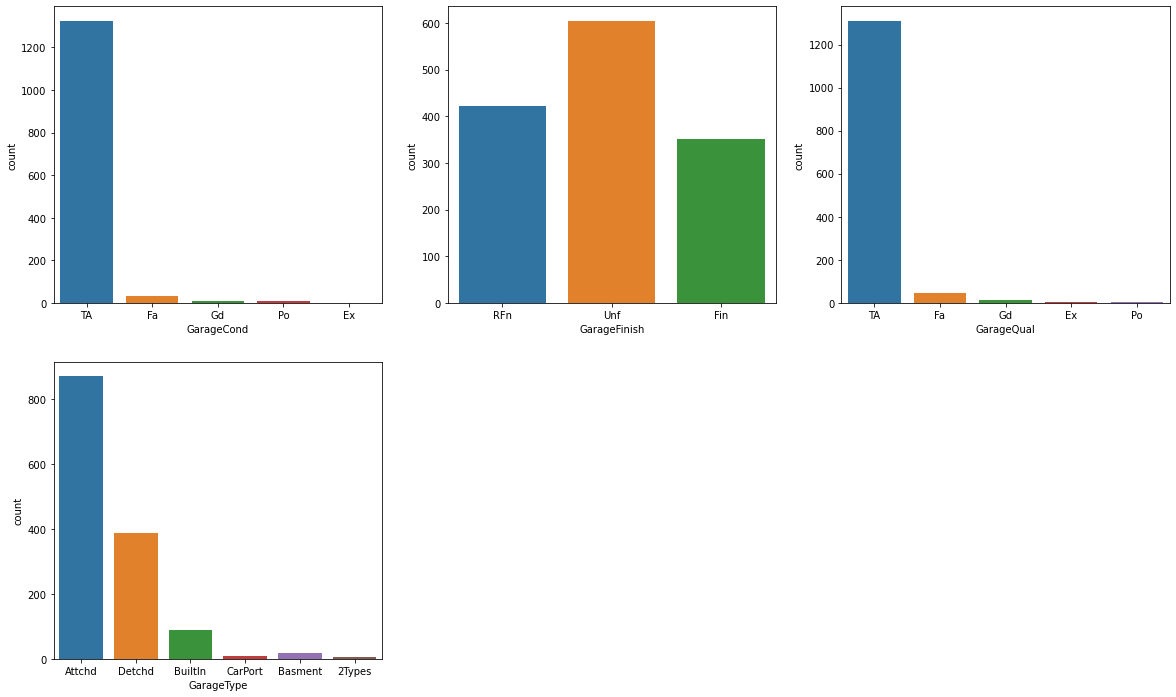

In [180]:
#imputing values in rest columns which are categorical
#Visualising the variables wih missing values

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'GarageCond', data = house_data)

plt.subplot(2,3,2)
sns.countplot(x = 'GarageFinish',  data = house_data)

plt.subplot(2,3,3)
sns.countplot(x = 'GarageQual', data = house_data)

plt.subplot(2,3,4)
sns.countplot(x = 'GarageType', data = house_data)


plt.show()

<AxesSubplot:xlabel='Electrical', ylabel='count'>

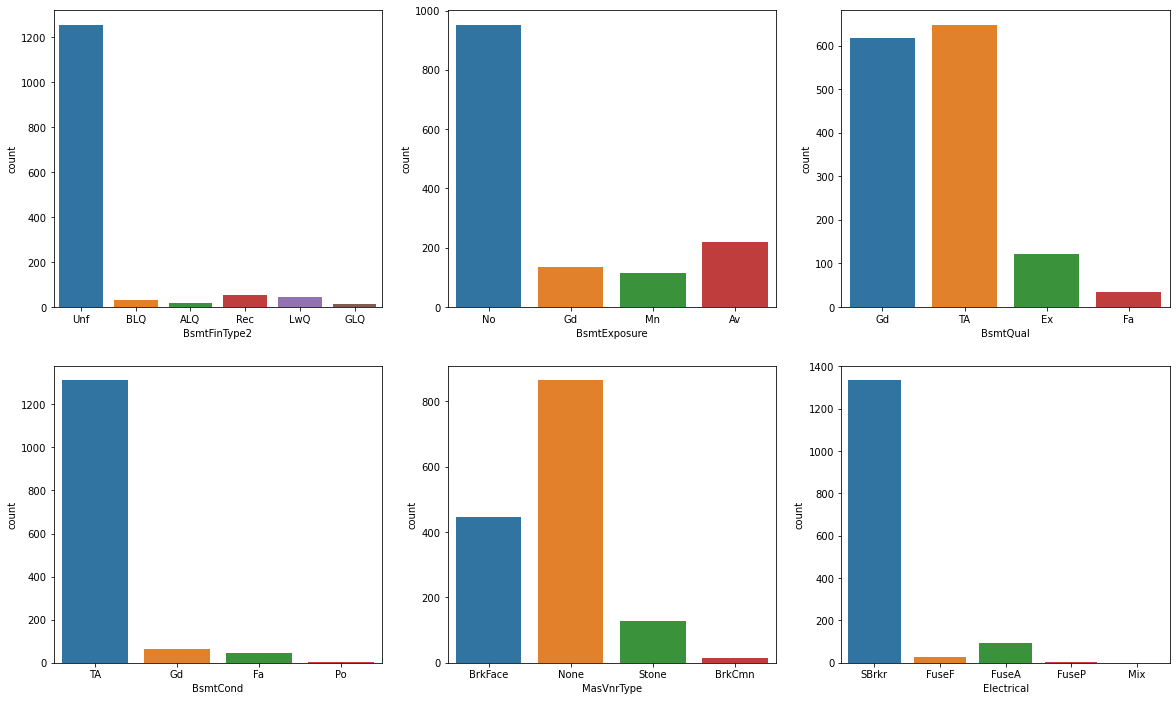

In [181]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'BsmtFinType2',  data = house_data)
plt.subplot(2,3,2)
sns.countplot(x = 'BsmtExposure',  data = house_data)
plt.subplot(2,3,3)
sns.countplot(x = 'BsmtQual',  data = house_data)
plt.subplot(2,3,4)
sns.countplot(x = 'BsmtCond',  data = house_data)

plt.subplot(2,3,5)
sns.countplot(x = 'MasVnrType', data = house_data)
plt.subplot(2,3,6)
sns.countplot(x = 'Electrical',  data = house_data)

In [182]:
# Cases when the house doesn't have the garrage so replacing null with No Garrage

house_data['GarageType'] = house_data['GarageType'].replace(np.nan, 'No Garage')
house_data['GarageFinish'] = house_data['GarageFinish'].replace(np.nan, 'No Garage')
house_data['GarageCond'] = house_data['GarageCond'].replace(np.nan, 'No Garage')
house_data['GarageQual'] = house_data['GarageQual'].replace(np.nan, 'No Garage')

house_data['BsmtFinType2'] = house_data['BsmtFinType2'].replace(np.nan, 'No Basement')
house_data['BsmtExposure'] = house_data['BsmtExposure'].replace(np.nan, 'No Basement')
house_data['BsmtQual'] = house_data['BsmtQual'].replace(np.nan, 'No Basement')
house_data['BsmtCond'] = house_data['BsmtCond'].replace(np.nan, 'No Basement')

house_data['MasVnrType'] = house_data['MasVnrType'].replace(np.nan, 'None') # replacing nan with the top option of this field
house_data['Electrical'] = house_data['Electrical'].replace(np.nan, 'SBrkr') # replacing nan with the top option of this field

### create new variables

In [183]:
#1. Create a new column named IsRemodel - This column would determine whether the house has been remodelled or not 

def remodelOrNot(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2
    
house_data['IsRemodel'] = house_data.apply(remodelOrNot, axis=1)
house_data.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,IsRemodel
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,1
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,1
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,0


In [184]:
# 2. Create a new column named BuiltAge and determine the age of the building at the time of selling

def builtAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
house_data['builtAge'] = house_data.apply(builtAge, axis=1)
house_data.head()  

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,IsRemodel,builtAge
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,0,5
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,0,31
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,1,6
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,1,36
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,0,8


In [185]:
# 3. Create a new column which would indicate if the Garage is old or new.

def garageOldNew(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:        
        return 0
    else:   
        return 1
    
house_data['OldOrNewGarage'] = house_data['GarageYrBlt'].apply(garageOldNew)
house_data.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,IsRemodel,builtAge,OldOrNewGarage
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,1,6,1
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,0,8,1


In [186]:
#now since new dimensions are created, we dont need dimensions from which these columns were derived

house_data.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)


In [187]:
#replace values in some of the features

In [188]:
#drop columns which are not needed
house_data.drop(['Utilities','Street','Condition1','Condition2'],axis=1,inplace=True)
house_data.drop(['LandSlope','LandContour','Electrical'],axis=1,inplace=True)
house_data.drop(['BsmtFinType2','PavedDrive','BsmtCond'],axis=1,inplace=True)
house_data.drop([ 'LotShape', 'LotConfig', 'MasVnrType',
       'ExterQual', 'BsmtFinType1', 'Id','RoofMatl'],axis=1,inplace=True)
house_data.drop(['Functional'],axis=1,inplace=True)

In [189]:
#create dummy variables
house_data.shape

(1460, 57)

In [190]:
# Removing Outliers

# Removing values beyond 98% for LotArea

nn_quartile_LotArea = house_data['LotArea'].quantile(0.98)
house_data = house_data[house_data["LotArea"] < nn_quartile_LotArea]

# Removing values beyond 98% for MasVnrArea

nn_quartile_MasVnrArea = house_data['MasVnrArea'].quantile(0.98)
house_data = house_data[house_data["MasVnrArea"] < nn_quartile_MasVnrArea]

# Removing values beyond 99% for TotalBsmtSF

nn_quartile_TotalBsmtSF = house_data['TotalBsmtSF'].quantile(0.99)
house_data = house_data[house_data["TotalBsmtSF"] < nn_quartile_TotalBsmtSF]

# Removing values beyond 99% for WoodDeckSF

nn_quartile_WoodDeckSF = house_data['WoodDeckSF'].quantile(0.99)
house_data = house_data[house_data["WoodDeckSF"] < nn_quartile_WoodDeckSF]

# Removing values beyond 99% for OpenPorchSF

nn_quartile_OpenPorchSF = house_data['OpenPorchSF'].quantile(0.99)
house_data = house_data[house_data["OpenPorchSF"] < nn_quartile_OpenPorchSF]

In [191]:
# For the following columns create dummies

# Creating dummies for MSZoning

dum_MSZoning = pd.get_dummies(house_data['MSZoning'], prefix='MSZoning', drop_first = True)
house_data = pd.concat([house_data, dum_MSZoning], axis = 1)

# Creating dummies for Neighborhood

dum_Neighborhood = pd.get_dummies(house_data['Neighborhood'], prefix='Neighborhood', drop_first = True)
house_data = pd.concat([house_data, dum_Neighborhood], axis = 1)

# Creating dummies for RoofStyle

dum_RoofStyle = pd.get_dummies(house_data['RoofStyle'], prefix='RoofStyle', drop_first = True)
house_data = pd.concat([house_data, dum_RoofStyle], axis = 1)

# Creating dummies for Exterior1st

dum_Exterior1st = pd.get_dummies(house_data['Exterior1st'], prefix='Exterior1st', drop_first = True)
house_data = pd.concat([house_data, dum_Exterior1st], axis = 1)

# Creating dummies for Exterior2nd

dum_Exterior2nd = pd.get_dummies(house_data['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
house_data = pd.concat([house_data, dum_Exterior2nd], axis = 1)

# Creating dummies for Foundation

dum_Foundation = pd.get_dummies(house_data['Foundation'], prefix='Foundation', drop_first = True)
house_data = pd.concat([house_data, dum_Foundation], axis = 1)

# Creating dummies for GarageType

dum_GarageType = pd.get_dummies(house_data['GarageType'], prefix='GarageType', drop_first = True)
house_data = pd.concat([house_data, dum_GarageType], axis = 1)

house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrArea,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,...,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage
0,60,RL,65.0,8450,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,196.0,TA,PConc,Gd,No,706,0,150,856,GasA,Ex,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,Attchd,RFn,2,548,TA,TA,0,61,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
1,20,RL,80.0,9600,Veenker,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,0.0,TA,CBlock,Gd,Gd,978,0,284,1262,GasA,Ex,Y,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,Attchd,RFn,2,460,TA,TA,298,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,60,RL,68.0,11250,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,162.0,TA,PConc,Gd,Mn,486,0,434,920,GasA,Ex,Y,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,Attchd,RFn,2,608,TA,TA,0,42,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
3,70,RL,60.0,9550,Crawfor,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,0.0,TA,BrkTil,TA,No,216,0,540,756,GasA,Gd,Y,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Detchd,Unf,3,642,TA,TA,0,35,272,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,NoRidge,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,350.0,TA,PConc,Gd,Av,655,0,490,1145,GasA,Ex,Y,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,Attchd,RFn,3,836,TA,TA,192,84,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0


In [192]:
house_data['new_BldgType'] = house_data['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 'None': 0 })
house_data['new_BsmtExposure'] = house_data['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
house_data['new_BsmtQual'] = house_data['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house_data['new_GarageFinish'] = house_data['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
house_data['new_HeatingQC'] = house_data['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house_data['new_HouseStyle'] = house_data['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
house_data['new_KitchenQual'] = house_data['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house_data['new_SaleCondition'] = house_data['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 'Alloca': 0, 'AdjLand': 0, 'None': 0})



In [193]:
#drop columns not needed
house_data.drop(['MSZoning','Neighborhood','BldgType','HouseStyle','RoofStyle','Exterior1st','Exterior2nd','ExterCond','Foundation','BsmtQual','BsmtExposure','BsmtFinSF2','Heating','HeatingQC','CentralAir','LowQualFinSF','BsmtHalfBath','KitchenAbvGr','KitchenQual','GarageType','GarageFinish','GarageQual','GarageCond','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','SaleType','SaleCondition','Neighborhood_Blueste','Neighborhood_BrDale','Neighborhood_BrkSide','Neighborhood_ClearCr','Neighborhood_CollgCr','Neighborhood_Gilbert','Neighborhood_IDOTRR','Neighborhood_Mitchel','Neighborhood_NAmes','Neighborhood_NPkVill','Neighborhood_NWAmes','Neighborhood_NoRidge','Neighborhood_Sawyer','Neighborhood_SawyerW','Neighborhood_Somerst','Neighborhood_Timber','Neighborhood_Veenker','RoofStyle_Gable','RoofStyle_Gambrel','RoofStyle_Hip','RoofStyle_Mansard','RoofStyle_Shed','Exterior1st_AsphShn','Exterior1st_BrkFace','Exterior1st_CemntBd','Exterior1st_HdBoard','Exterior1st_ImStucc','Exterior1st_MetalSd','Exterior1st_Plywood','Exterior1st_Stone','Exterior1st_WdShing','Exterior2nd_AsphShn','Exterior2nd_Brk Cmn','Exterior2nd_BrkFace','Exterior2nd_CmentBd','Exterior2nd_HdBoard','Exterior2nd_ImStucc','Exterior2nd_MetalSd','Exterior2nd_Other','Exterior2nd_Plywood','Exterior2nd_Stone','Exterior2nd_Wd Shng','Foundation_Wood','GarageType_Attchd','GarageType_Basment','GarageType_BuiltIn','GarageType_Detchd','GarageType_No Garage',],axis=1,inplace=True)



# 2 data visualization and EDA

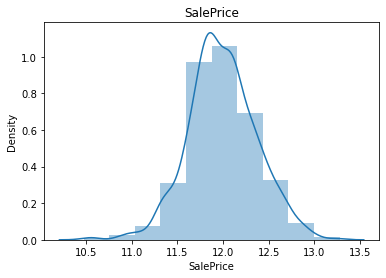

In [194]:
# Visualise the target variable

house_data['SalePrice'] = np.log1p(house_data['SalePrice'])

plt.title('SalePrice')
sns.distplot(house_data['SalePrice'], bins=10)
plt.show()

<Figure size 720x360 with 0 Axes>

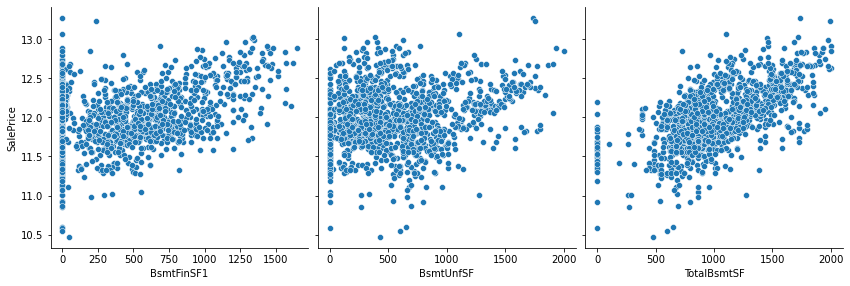

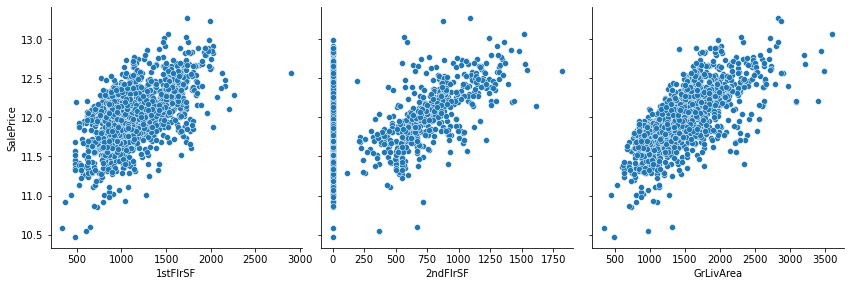

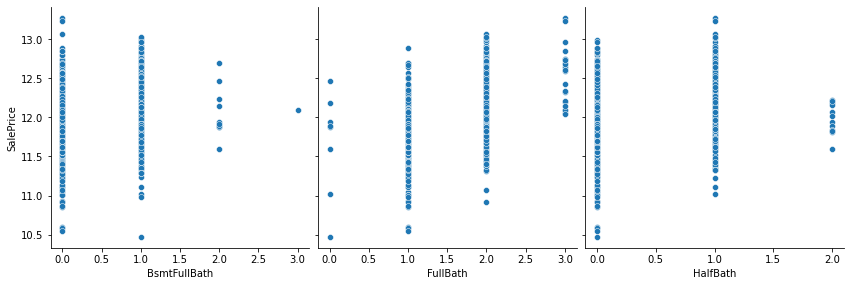

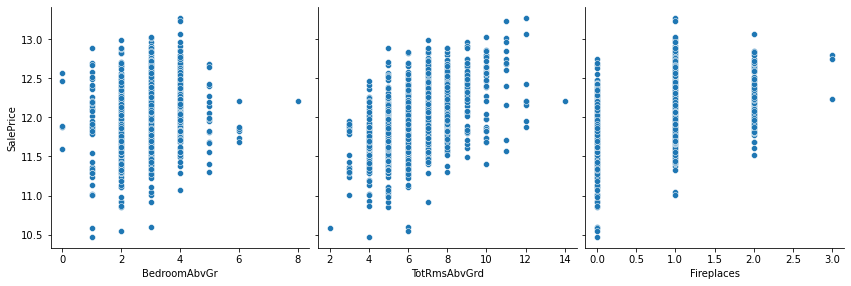

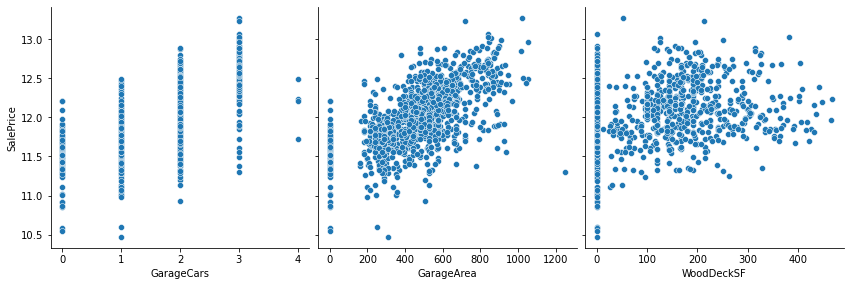

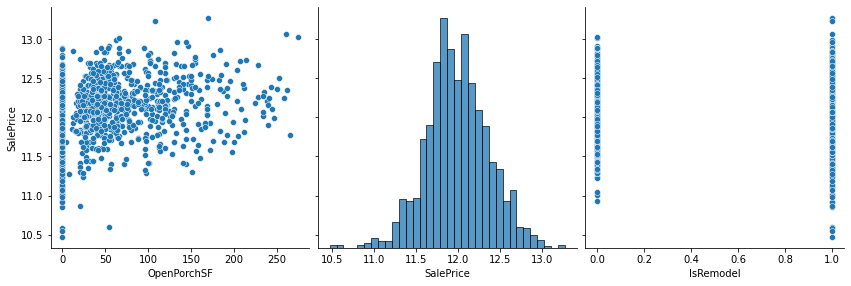

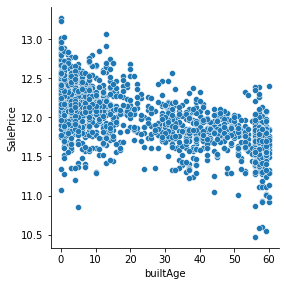

In [195]:
# Check the numerical values using pairplots

plt.figure(figsize=(10,5))
#sns.pairplot(house_data, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
#sns.pairplot(house_data, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house_data, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house_data, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house_data, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house_data, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house_data, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house_data, x_vars=['OpenPorchSF','SalePrice', 'IsRemodel'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house_data, x_vars=['builtAge'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

## starting modelling

In [196]:
#Remove any last Nan which could not pass thorugh model fit
house_data['new_BsmtExposure'] = house_data['new_BsmtExposure'].fillna(0)
house_data['new_GarageFinish'] = house_data['new_GarageFinish'].fillna(0)
house_data['new_BsmtQual'] = house_data['new_BsmtQual'].fillna(0)

In [197]:
# Putting all feature variable to X

X = house_data.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,IsRemodel,builtAge,OldOrNewGarage,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_MeadowV,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_StoneBr,Exterior1st_BrkComm,Exterior1st_CBlock,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_CBlock,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,GarageType_CarPort,new_BldgType,new_BsmtExposure,new_BsmtQual,new_GarageFinish,new_HeatingQC,new_HouseStyle,new_KitchenQual,new_SaleCondition
0,60,65.0,8450,7,5,196.0,706,150,856,856,854,1710,1,2,1,3,8,0,2,548,0,61,0,5,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1.0,4.0,2.0,5,4,4,1
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,0,1262,0,2,0,3,6,1,2,460,298,0,0,31,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,4.0,4.0,2.0,5,1,3,1
2,60,68.0,11250,7,5,162.0,486,434,920,920,866,1786,1,2,1,3,6,1,2,608,0,42,1,6,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,2.0,4.0,2.0,5,4,4,1
3,70,60.0,9550,7,5,0.0,216,540,756,961,756,1717,1,1,0,3,7,1,3,642,0,35,1,36,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1.0,3.0,1.0,4,4,4,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,1053,2198,1,2,1,4,9,1,3,836,192,84,0,8,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,3.0,4.0,2.0,5,4,4,1


In [198]:
# Putting response variable to y

y = house_data['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [199]:
# scaling the features

from sklearn.preprocessing import scale


cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'IsRemodel', 'builtAge',
       'OldOrNewGarage', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_MeadowV', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_StoneBr', 'Exterior1st_BrkComm',
       'Exterior1st_CBlock', 'Exterior1st_Stucco', 'Exterior1st_VinylSd',
       'Exterior1st_Wd Sdng', 'Exterior2nd_CBlock', 'Exterior2nd_Stucco',
       'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'Foundation_CBlock',
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'GarageType_CarPort', 'new_BldgType', 'new_B

In [200]:
# split into train and test

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=42)

### using RFE

In [201]:
# Running RFE with the output number of the variable equal to 50

lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, step=50)            
rfe = rfe.fit(X_train, y_train)

In [202]:
# Assign the columns selected by RFE to cols

col = X_train.columns[rfe.support_]

# assign the 50 features selected using RFE to a dataframe and view them

house_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
house_df = house_df.loc[house_df['rfe_support'] == True]
house_df.reset_index(drop=True, inplace=True)

house_df

,Variable,rfe_support,rfe_ranking
0,LotArea,True,1
1,OverallQual,True,1
2,OverallCond,True,1
3,BsmtFinSF1,True,1
4,TotalBsmtSF,True,1
5,1stFlrSF,True,1
6,2ndFlrSF,True,1
7,GrLivArea,True,1
8,HalfBath,True,1
9,TotRmsAbvGrd,True,1


In [203]:
# Assign the 50 columns to X_train_rfe

X_train_rfe = X_train[col]

In [204]:
# Associate the new 50 columns to X_train and X_test for further analysis

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

## model building and evaluation

In [205]:
# list pf alphas

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [206]:

# display the mean scores

ridge_model_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_model_results = ridge_model_results[ridge_model_results['param_alpha']<=500]
ridge_model_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])




,param_alpha,mean_train_score,mean_test_score,rank_test_score
16,5.0,-0.085114,-0.087877,1
17,6.0,-0.085136,-0.087878,2
18,7.0,-0.085160,-0.087883,3
19,8.0,-0.085186,-0.087888,4
20,9.0,-0.085212,-0.087892,5
21,10.0,-0.085236,-0.087897,6
15,4.0,-0.085093,-0.087898,7
14,3.0,-0.085075,-0.087926,8
13,2.0,-0.085056,-0.087965,9
22,20,-0.085436,-0.087985,10


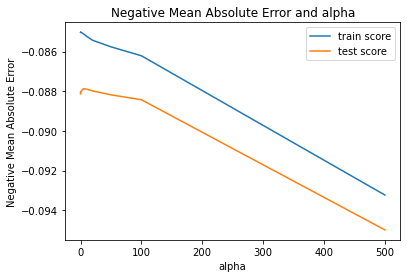

In [207]:
# plotting mean test and train scoes with alpha 

ridge_model_results['param_alpha'] = ridge_model_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_model_results['param_alpha'], ridge_model_results['mean_train_score'])
plt.plot(ridge_model_results['param_alpha'], ridge_model_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [208]:
# get the best estimator for lambda

ridge_model_cv.best_estimator_

Ridge(alpha=5.0)

In [209]:
# check the coefficient values with lambda = 10

alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.0300184 ,  0.09048217,  0.04571029,  0.0417992 ,  0.04740489,
        0.02691322,  0.02939187,  0.06485441,  0.01742731, -0.00134442,
        0.02680869,  0.0486499 , -0.03501649,  0.06242351,  0.02019226,
        0.09292632,  0.04659506,  0.02322053,  0.02194243,  0.017884  ,
       -0.00158662, -0.02358286, -0.03136676, -0.00158662,  0.03251535,
        0.01943703,  0.01769241,  0.05654826,  0.01775067])

In [210]:
# Check the mean squared error

mean_squared_error(y_test, ridge.predict(X_test))

0.015516381890298855

In [211]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,LotArea,0.0300
1,OverallQual,0.0905
2,OverallCond,0.0457
3,BsmtFinSF1,0.0418
4,TotalBsmtSF,0.0474
5,1stFlrSF,0.0269
6,2ndFlrSF,0.0294
7,GrLivArea,0.0649
8,HalfBath,0.0174
9,TotRmsAbvGrd,-0.0013


In [212]:
# Assign the Features and their coefficient values to a dictionary which would be used while plotting the bar plot

ridge_coeff = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff

{'LotArea': 0.03,
 'OverallQual': 0.0905,
 'OverallCond': 0.0457,
 'BsmtFinSF1': 0.0418,
 'TotalBsmtSF': 0.0474,
 '1stFlrSF': 0.0269,
 '2ndFlrSF': 0.0294,
 'GrLivArea': 0.0649,
 'HalfBath': 0.0174,
 'TotRmsAbvGrd': -0.0013,
 'Fireplaces': 0.0268,
 'GarageCars': 0.0486,
 'builtAge': -0.035,
 'MSZoning_FV': 0.0624,
 'MSZoning_RH': 0.0202,
 'MSZoning_RL': 0.0929,
 'MSZoning_RM': 0.0466,
 'Neighborhood_Crawfor': 0.0232,
 'Neighborhood_NridgHt': 0.0219,
 'Neighborhood_StoneBr': 0.0179,
 'Exterior1st_CBlock': -0.0016,
 'Exterior1st_VinylSd': -0.0236,
 'Exterior1st_Wd Sdng': -0.0314,
 'Exterior2nd_CBlock': -0.0016,
 'Exterior2nd_VinylSd': 0.0325,
 'Exterior2nd_Wd Sdng': 0.0194,
 'Foundation_CBlock': 0.0177,
 'Foundation_PConc': 0.0565,
 'new_BsmtExposure': 0.0178}

In [213]:
# Do an RFE to minimise the features to 15
X_train_ridge = X_train[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(lm, step=15)            
rfe = rfe.fit(X_train_ridge, y_train)

In [214]:
# Method to get the coefficient values

def find(x):
    return ridge_coeff[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

house_df2 = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
house_df2 = house_df2.loc[house_df2['rfe_support'] == True]
house_df2.reset_index(drop=True, inplace=True)

house_df2['Coefficient'] = house_df2['Features'].apply(find)
house_df2 = house_df2.sort_values(by=['Coefficient'], ascending=False)
house_df2 = house_df2.head(10)
house_df2

,Features,rfe_support,rfe_ranking,Coefficient
8,MSZoning_RL,True,1,0.0929
0,OverallQual,True,1,0.0905
4,GrLivArea,True,1,0.0649
7,MSZoning_FV,True,1,0.0624
13,Foundation_PConc,True,1,0.0565
5,GarageCars,True,1,0.0486
3,TotalBsmtSF,True,1,0.0474
9,MSZoning_RM,True,1,0.0466
1,OverallCond,True,1,0.0457
2,BsmtFinSF1,True,1,0.0418


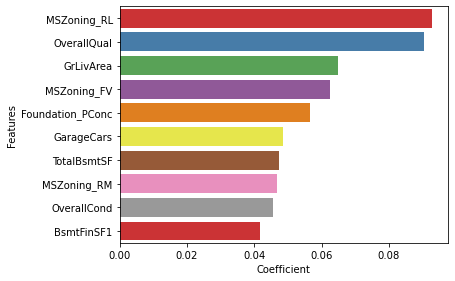

In [215]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = house_df2)
plt.show()

## Lasso

In [216]:
lasso = Lasso()

# list of alphas

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [217]:
# display the mean scores

lasso_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
2,0.0003,-0.085162,-0.087988,1
3,0.0004,-0.085239,-0.088005,2
1,0.0002,-0.085103,-0.088007,3
0,0.0001,-0.085056,-0.088025,4
4,0.0005,-0.085324,-0.088039,5
5,0.001,-0.085678,-0.088226,6
6,0.002,-0.086130,-0.088522,7
7,0.003,-0.086300,-0.088655,8
8,0.004,-0.086446,-0.088826,9
9,0.005,-0.086601,-0.089027,10


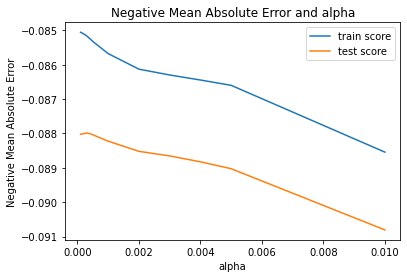

In [218]:
# plotting mean test and train scoes with alpha 

lasso_results['param_alpha'] = lasso_results['param_alpha'].astype('float64')

# plotting

plt.plot(lasso_results['param_alpha'], lasso_results['mean_train_score'])
plt.plot(lasso_results['param_alpha'], lasso_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [219]:
# get the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.0003)

In [220]:
# check the coefficient values with lambda = 0.0004

alpha = 0.0004

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 0.02994793,  0.0917279 ,  0.04557986,  0.04198488,  0.0474424 ,
        0.002581  ,  0.        ,  0.09650546,  0.01695623, -0.00103239,
        0.02642177,  0.04938619, -0.03433572,  0.0720256 ,  0.02468582,
        0.11213745,  0.06293637,  0.02323802,  0.02140086,  0.01738563,
       -0.00217528, -0.01884427, -0.03065176, -0.00074201,  0.02753873,
        0.01802762,  0.01739058,  0.0561923 ,  0.01755489])

In [221]:
# Check the mean squared error

mean_squared_error(y_test, lasso.predict(X_test))

0.015351050762215383

In [222]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,LotArea,0.0299
1,OverallQual,0.0917
2,OverallCond,0.0456
3,BsmtFinSF1,0.0420
4,TotalBsmtSF,0.0474
5,1stFlrSF,0.0026
6,GrLivArea,0.0965
7,HalfBath,0.0170
8,TotRmsAbvGrd,-0.0010
9,Fireplaces,0.0264


In [223]:
# Put the Features and Coefficients in dictionary

lasso_coeff = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff

{'LotArea': 0.02994793465249771,
 'OverallQual': 0.09172790193234161,
 'OverallCond': 0.04557986131631368,
 'BsmtFinSF1': 0.0419848835150471,
 'TotalBsmtSF': 0.04744240253404528,
 '1stFlrSF': 0.0025809972414407804,
 '2ndFlrSF': 0.0,
 'GrLivArea': 0.09650546363955242,
 'HalfBath': 0.01695622706236648,
 'TotRmsAbvGrd': -0.0010323933040987069,
 'Fireplaces': 0.026421769767834318,
 'GarageCars': 0.049386189324166475,
 'builtAge': -0.03433572195552776,
 'MSZoning_FV': 0.0720255964701864,
 'MSZoning_RH': 0.02468581807994495,
 'MSZoning_RL': 0.11213745452449786,
 'MSZoning_RM': 0.06293636917157489,
 'Neighborhood_Crawfor': 0.023238024742768325,
 'Neighborhood_NridgHt': 0.021400863805460354,
 'Neighborhood_StoneBr': 0.017385626213779037,
 'Exterior1st_CBlock': -0.0021752823040131863,
 'Exterior1st_VinylSd': -0.01884427254905427,
 'Exterior1st_Wd Sdng': -0.030651755093270668,
 'Exterior2nd_CBlock': -0.0007420109414754644,
 'Exterior2nd_VinylSd': 0.0275387307824391,
 'Exterior2nd_Wd Sdng': 0.018

In [224]:
# Do an RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, step=15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [225]:
# Method to get the coefficient values

def find(x):
    return lasso_coeff[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

,Features,rfe_support,rfe_ranking,Coefficient
8,MSZoning_RL,True,1,0.112137
4,GrLivArea,True,1,0.096505
0,OverallQual,True,1,0.091728
7,MSZoning_FV,True,1,0.072026
9,MSZoning_RM,True,1,0.062936
13,Foundation_PConc,True,1,0.056192
5,GarageCars,True,1,0.049386
3,TotalBsmtSF,True,1,0.047442
1,OverallCond,True,1,0.045580
2,BsmtFinSF1,True,1,0.041985


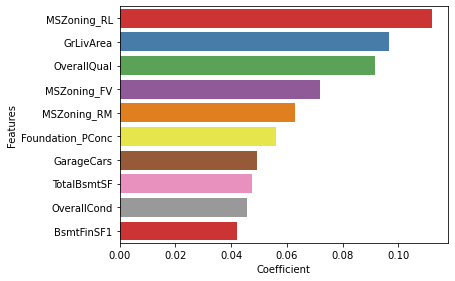

In [226]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp2_df)
plt.show()

### The above graph displays the top 10 variables based on the Lasso Regression model that are significant in predicting the price of a house.


## Optimal values are: 
Ridge - 0.01551
Lasso - 0.01535

The above graph displays the top 10 variables based on the Lasso Regression model that are significant in predicting the price of a house.

Conclusion :
The optimal lambda value in case of Ridge and Lasso is as below:

Ridge - 10
Lasso - 0.0004
The Mean Squared error in case of Ridge and Lasso are:

Ridge - 0.01551
Lasso - 0.01535
The Mean Squared Error of Lasso is slightly lower than that of Ridge

Also, since Lasso helps in feature reduction (as the coefficient value of one of the feature became 0), Lasso has a better edge over Ridge.

Hence based on Lasso, the factors that generally affect the price are the Zoning classification, Living area square feet, Overall quality and condition of the house, Foundation type of the house, Number of cars that can be accomodated in the garage, Total basement area in square feet and the Basement finished square feet area

Therefore, the variables predicted by Lasso in the above bar chart as significant variables for predicting the price of a house.